<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task/blob/main/DW21Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
users.head(5)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [51]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [62]:
users.rename(columns={'object_id':'user_id'}, inplace=True)
#drop the personal details columns as they arenot useful
users.drop(['name', 'email'], axis=1, inplace=True)

users.head(5)


,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [55]:
engagements = pd.read_csv('takehome_user_engagement.csv')
engagements.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [56]:
engagements.time_stamp = pd.to_datetime(engagements.time_stamp)
engagements_2 = engagements.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()
engagements_2 = pd.DataFrame(engagements_2)
engagements_2.head()


visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [57]:
# Sum number of visits for seven-day period
engagements_2 = engagements_2.rolling(window=7, min_periods=1).sum()
engagements_2.reset_index(inplace=True)
engagements_2.head()

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0


In [58]:
# Compute max number of visits for each user for seven-rolling-day periods.
engagements_3 = engagements_2.groupby('user_id')[['visited']].max()
engagements_3.head()


,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


In [59]:
# Add target column 'adopted'
engagements_3.loc[engagements_3['visited'] >= 3, 'adopted_user'] = 1
engagements_3.loc[engagements_3['visited'] < 3, 'adopted_user'] = 0

In [60]:
# Change data type to 'int'
engagements_3['visited'] = engagements_3['visited'].astype(int)
engagements_3['adopted_user'] = engagements_3['adopted_user'].astype(int)
engagements_3.reset_index(inplace=True) 
engagements_3.head()


,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1


In [63]:
# Merge two data frames users and engagement for getting adopted users
df = engagements_3.merge(users, how='inner', on='user_id', sort=True)
df.head(5)

,user_id,visited,adopted_user,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3,1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2,0,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,3,1,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,4,1,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [64]:
df.isnull().sum()


user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
dtype: int64

In [65]:
# Fill the invited_by_user_id column's NaN values with 0.
df['invited_by_user_id'].fillna(0, inplace=True)
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)

In [66]:
# Do some feature engineering
df.creation_time = pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df['active_days'] = df['last_session_creation_time'] - df['creation_time']
df['active_days'] = df['active_days'].dt.days
df.head()

,user_id,visited,adopted_user,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,1,0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,-16183
1,2,3,1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,-16025
2,3,2,0,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,-15784
3,4,3,1,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,-15847
4,5,4,1,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,-15723


In [67]:
df.isnull().sum()


user_id                       0
visited                       0
adopted_user                  0
creation_time                 0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
dtype: int64

In [68]:
# Select columns for machine learning algorithms
df_ml = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'active_days', 'adopted_user' ]]
df_ml.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
0,GUEST_INVITE,1,0,11,10803,-16183,0
1,ORG_INVITE,0,0,1,316,-16025,1
2,ORG_INVITE,0,0,94,1525,-15784,0
3,GUEST_INVITE,0,0,1,5151,-15847,1
4,GUEST_INVITE,0,0,193,5240,-15723,1


In [69]:
# Huge inbalance between the two target classes.
df_ml.adopted_user.value_counts()

1    8015
0     808
Name: adopted_user, dtype: int64

In [70]:
# Subset the data frame
df_ml_class1 = df_ml[df_ml['adopted_user']==1]
df_ml_class0 = df_ml[df_ml['adopted_user']==0]

In [71]:
# Randomly sample the same number of rows as dataframe df_ml_class0.
df_ml_class1_sampled = df_ml_class1.sample(n=len(df_ml_class0), random_state=101)

In [72]:
# Make a balanced data frame with the same number of observations from each target class.
df_ml_balanced = df_ml_class1_sampled.append(df_ml_class0)

In [73]:
df_ml_balanced.adopted_user.value_counts()

1    808
0    808
Name: adopted_user, dtype: int64

In [75]:
# Compute correlations for the columns of df_ml
corr = df_ml_balanced.corr()
corr

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
opted_in_to_mailing_list,1.000000,0.485786,0.023602,0.020939,-0.019471,-0.023099
enabled_for_marketing_drip,0.485786,1.000000,0.021381,-0.001612,-0.011903,-0.005159
org_id,0.023602,0.021381,1.000000,-0.032698,0.010305,-0.003302
invited_by_user_id,0.020939,-0.001612,-0.032698,1.000000,0.036683,0.031125
active_days,-0.019471,-0.011903,0.010305,0.036683,1.000000,0.040386
adopted_user,-0.023099,-0.005159,-0.003302,0.031125,0.040386,1.000000


In [76]:
# Make dummy variables
creation_source_dum = pd.get_dummies(df_ml_balanced['creation_source'], drop_first=True)
df_ml_balanced.head()


,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
538,GUEST_INVITE,0,1,56,6965,-15919,1
1962,SIGNUP_GOOGLE_AUTH,0,0,51,0,-15981,1
8498,SIGNUP_GOOGLE_AUTH,0,0,121,0,-15904,1
4025,SIGNUP_GOOGLE_AUTH,1,1,2,0,-16096,1
4394,SIGNUP,1,0,178,0,-16092,1


In [77]:
df_ml_balanced.drop(['creation_source'], axis=1, inplace=True)


In [78]:
# Features
X = pd.concat([df_ml_balanced, creation_source_dum], axis=1)
X.drop(['adopted_user'], axis=1, inplace=True)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
538,0,1,56,6965,-15919,0,0,0,0
1962,0,0,51,0,-15981,0,0,0,1
8498,0,0,121,0,-15904,0,0,0,1
4025,1,1,2,0,-16096,0,0,0,1
4394,1,0,178,0,-16092,0,0,1,0


In [79]:
# Target
y = df_ml_balanced['adopted_user']
y.head()


538     1
1962    1
8498    1
4025    1
4394    1
Name: adopted_user, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
# Split the data into a train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
# Fit and models and make predictions
clf_LR = LogisticRegression(random_state=101, n_jobs = -1)
clf_LR.fit(X_train, y_train)
y_predicted_LR = clf_LR.predict(X_test)

In [86]:
# Make a function to plot the ROC curve
def roc_plot(clf, label):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf,_ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr_rf, tpr_rf, label = label)
    print(label + " AUC: ", roc_auc_score(y_score = y_pred_proba, y_true = y_test))


Logistic Regression AUC:  0.5148530012249898


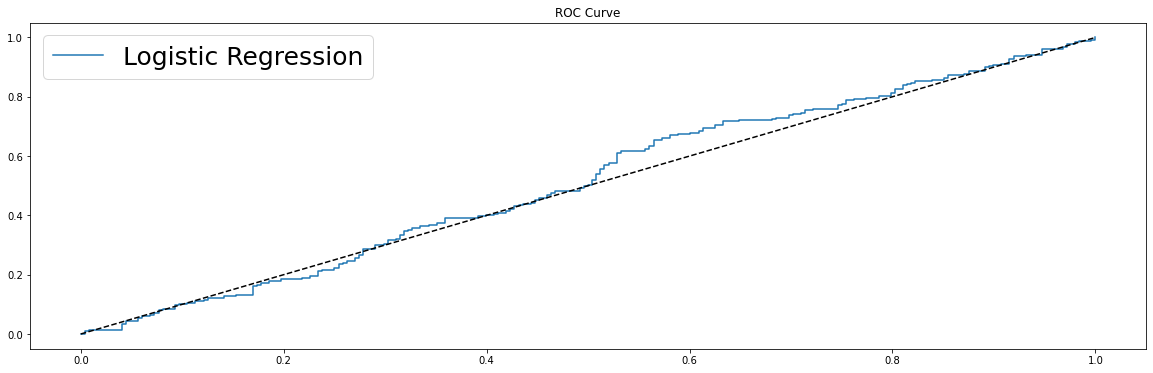

In [88]:
import matplotlib.pyplot as plt
# Plot ROC Curves
plt.figure(figsize = (20,6))

roc_plot(clf_LR, 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.legend(loc='best', frameon=True, fontsize=25)

In [90]:
# Are all the features important for making the prediction?
# Use Random Forest to evaluate the importance of features on the classification task.
from sklearn.ensemble import RandomForestClassifier

names = X.columns
rf = RandomForestClassifier()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.378, 'active_days'), (0.3436, 'org_id'), (0.1864, 'invited_by_user_id'), (0.026, 'opted_in_to_mailing_list'), (0.0192, 'enabled_for_marketing_drip'), (0.0182, 'ORG_INVITE'), (0.0106, 'SIGNUP'), (0.0091, 'SIGNUP_GOOGLE_AUTH'), (0.009, 'PERSONAL_PROJECTS')]


The most important features to predict whether a user is an 'adopted user' are:
  
1.   **number of 'active days' (difference between last login date and creation date)**
2.   **organization ID**

